In [1]:
# Import libraries 

import pandas as pd 
import numpy as np 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib 
import pylab as pl 
import sklearn 
from sklearn.cluster import KMeans

In [2]:
# Create path 

path = os.getcwd()[:-10]

In [3]:
path

'C:\\Users\\Megan\\Documents\\Analytics\\Gun Violence Achievement 6\\'

In [5]:
# Import dataframe 

df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','final_gun_data.csv'), index_col=False)

In [6]:
df.head()

,Unnamed: 0,State,#_killed,#_injured,latitude,longitude,n_guns_involved,Geographic_Region,Year,Month,Day,State_Year,State Population,Population_millions,Total Victims,Victims_per_100000,Population Flag,Politics,Season
0,0,District of Columbia,0.0,5.0,38.8978,-76.9717,1.0,East,2013,1.0,26.0,"District of Columbia, 2013",617513,0.617513,5.0,53.2572,Low Populated State,Liberal State,Winter
1,1,District of Columbia,0.0,13.0,38.9062,-77.0099,4.0,East,2013,3.0,11.0,"District of Columbia, 2013",617513,0.617513,13.0,53.2572,Low Populated State,Liberal State,Spring
2,2,District of Columbia,0.0,4.0,38.8583,-76.9883,1.0,East,2013,7.0,13.0,"District of Columbia, 2013",617513,0.617513,4.0,53.2572,Low Populated State,Liberal State,Summer
3,3,District of Columbia,1.0,3.0,38.9047,-77.0122,1.0,East,2013,9.0,12.0,"District of Columbia, 2013",617513,0.617513,4.0,53.2572,Low Populated State,Liberal State,Autumn
4,4,District of Columbia,11.0,3.0,38.8730,-76.9977,2.0,East,2013,9.0,16.0,"District of Columbia, 2013",617513,0.617513,14.0,53.2572,Low Populated State,Liberal State,Autumn


In [7]:
# Delete unnamed column 

df = df.drop(columns = ['Unnamed: 0'])

In [8]:
df.head()

,State,#_killed,#_injured,latitude,longitude,n_guns_involved,Geographic_Region,Year,Month,Day,State_Year,State Population,Population_millions,Total Victims,Victims_per_100000,Population Flag,Politics,Season
0,District of Columbia,0.0,5.0,38.8978,-76.9717,1.0,East,2013,1.0,26.0,"District of Columbia, 2013",617513,0.617513,5.0,53.2572,Low Populated State,Liberal State,Winter
1,District of Columbia,0.0,13.0,38.9062,-77.0099,4.0,East,2013,3.0,11.0,"District of Columbia, 2013",617513,0.617513,13.0,53.2572,Low Populated State,Liberal State,Spring
2,District of Columbia,0.0,4.0,38.8583,-76.9883,1.0,East,2013,7.0,13.0,"District of Columbia, 2013",617513,0.617513,4.0,53.2572,Low Populated State,Liberal State,Summer
3,District of Columbia,1.0,3.0,38.9047,-77.0122,1.0,East,2013,9.0,12.0,"District of Columbia, 2013",617513,0.617513,4.0,53.2572,Low Populated State,Liberal State,Autumn
4,District of Columbia,11.0,3.0,38.8730,-76.9977,2.0,East,2013,9.0,16.0,"District of Columbia, 2013",617513,0.617513,14.0,53.2572,Low Populated State,Liberal State,Autumn


In [21]:
# Create subset for KMeans clustering 

new = df[['Population_millions','Victims_per_100000']]

In [22]:
# Use elbow technique to find number of clusters 

num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [23]:
score = [kmeans[i].fit(new).score(new) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-33843335.64452489,
 -16598219.175551763,
 -9971179.354607357,
 -7056974.522062874,
 -4195065.474299738,
 -2995139.679162205,
 -1930913.4680887007,
 -1548192.6490888016,
 -1197803.3648347338]

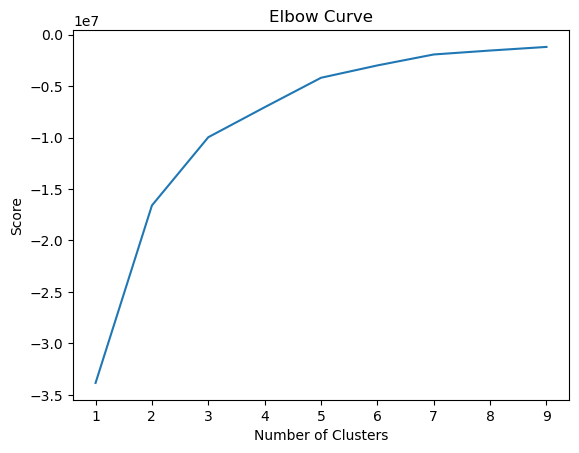

In [24]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Best to use 4 clusters for analysis 

In [28]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(new)

KMeans(n_clusters=4)

In [29]:
new['clusters'] = kmeans.fit_predict(new)

C:\Users\Megan\AppData\Local\Temp\ipykernel_8604\771931456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['clusters'] = kmeans.fit_predict(new)


In [30]:
new['clusters'].value_counts()

0    112646
2     55769
3     35340
1     14906
Name: clusters, dtype: int64

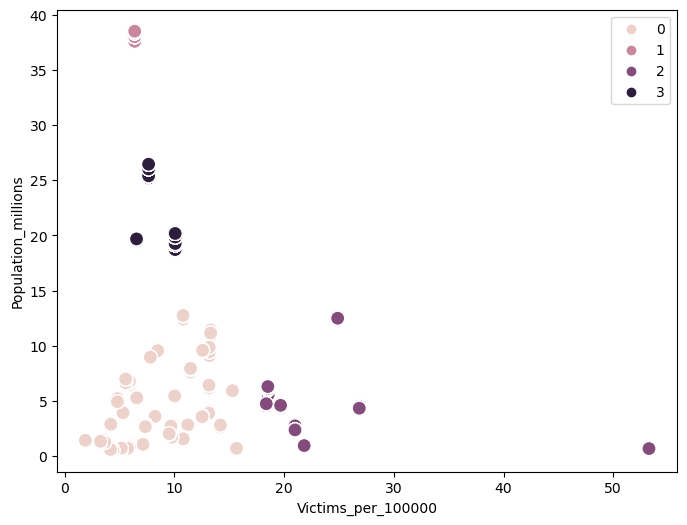

In [34]:
# Plot the clusters for the "Population_millions" and "Victims_per_100000" variables.

plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=new['Victims_per_100000'], y=new['Population_millions'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Victims_per_100000') # Label x-axis.
plt.ylabel('Population_millions') # Label y-axis.
plt.show()

In [35]:
new.loc[new['clusters'] == 3, 'cluster'] = 'black'
new.loc[new['clusters'] == 2, 'cluster'] = 'dark purple'
new.loc[new['clusters'] == 1, 'cluster'] = 'pink'
new.loc[new['clusters'] == 0, 'cluster'] = 'light pink'


C:\Users\Megan\AppData\Local\Temp\ipykernel_8604\224314360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new.loc[new['clusters'] == 3, 'cluster'] = 'black'


In [37]:
new.groupby('cluster').agg({'Victims_per_100000':['mean', 'median'],  
                         'Population_millions':['mean', 'median']})

Victims_per_100000            Population_millions           
                          mean     median                mean     median
cluster                                                                 
black                 8.301982   7.639355           21.813670  19.859948
dark purple          23.621855  21.821521            6.761511   5.568576
light pink           10.293055  10.785528            6.824158   6.684113
pink                  6.372032   6.372032           38.373945  38.521420

#### According to the results of the K-means clustering, there isn't a significant relationship between these two variables. The pink clusters have the highest population, but the lowest number of victims, while the dark purple cluster is full of low population states with a high rate of gun violence victims.